# Vergunningsaanvragen zakken in 2025 weg naar absoluut dieptepunt
**Embuild Vlaanderen – Data story (Jupyter notebook)**  
**Datum publicatie (bronverhaal):** 13 aug 2025

> **Kernboodschap**  
> Nieuwbouwactiviteit is compleet uit balans. Het aantal vergunningsaanvragen voor nieuwbouw zakt in Q1 2025 naar een absoluut dieptepunt. Ook renovatie en sloop/heropbouw nemen af. Ingrijpende maatregelen dringen zich op.

**Contact**: info.vlaanderen@embuild.be — Kunstlaan 20, B-1000 Brussel, T. +32 (0)25 45 57 49


## Waarom dit belangrijk is
Tegen 2040 stijgt het aantal huishoudens in Vlaanderen van 3,0 naar 3,3 miljoen. Het aanbod aan woningen blijft achter, terwijl vergunningsaanvragen voor **nieuwbouw**, **grondige renovatie/hergebruik** en **sloop & heropbouw** in 2025 terugvallen. Dit notebook reconstrueert de belangrijkste cijfers en visualisaties uit het verhaal en laat toe om zelf te exploreren.


## Data & methode (kort)
- **Bron**: Embuild Vlaanderen *Bouwbalans*. CSV-bestand met kwartaaldata: `data/graph_data_export.csv`  
- **Kolommen**: `Datum`, `Nieuwbouw`, `Nieuwbouw (voortschrijdend gemiddelde)`, `Sloop`, `Sloop (voortschrijdend gemiddelde)`, `Verbouwen of hergebruik`, `Verbouwen of hergebruik (voortschrijdend gemiddelde)`
- **Definities**: *voortschrijdend gemiddelde* is een 1-jarig voortschrijdend gemiddelde en vlakt seizoenseffecten uit.
- **Opmerking**: De code hieronder bevat lichte validatie en herbruikbare functies voor grafieken.


In [1]:
# 👉 Pad naar de CSV (pas aan indien nodig)
CSV_PATH = "../assets/Embuild_vergunningen_story/graph_data_export.csv"

import pandas as pd
from pathlib import Path

def load_data(path):
    df = pd.read_csv(path)
    # Parse dates
    df["Datum"] = pd.to_datetime(df["Datum"], utc=False, errors="coerce")
    # Sorteer op datum om zeker te zijn
    df = df.sort_values("Datum").reset_index(drop=True)
    return df

try:
    df = load_data(CSV_PATH)
    print(f"✔ Data geladen uit: {Path(CSV_PATH).resolve()}")
    display(df.head(3))
except Exception as e:
    print("⚠ Kon de data niet laden. Controleer het pad of bestandsnaam.")
    print("Verwachte kolommen: 'Datum', 'Nieuwbouw', 'Nieuwbouw (voortschrijdend gemiddelde)', 'Sloop', 'Sloop (voortschrijdend gemiddelde)', 'Verbouwen of hergebruik', 'Verbouwen of hergebruik (voortschrijdend gemiddelde)'")
    raise

✔ Data geladen uit: /Users/gerthuybrechts/pyprojects/dashboard_01/docs/assets/Embuild_vergunningen_story/graph_data_export.csv


,Datum,Nieuwbouw,Nieuwbouw (voortschrijdend gemiddelde),Sloop,Sloop (voortschrijdend gemiddelde),Verbouwen of hergebruik,Verbouwen of hergebruik (voortschrijdend gemiddelde)
0,2018-01-01,7443,NaN,2023,NaN,4747,NaN
1,2018-04-01,14795,NaN,3517,NaN,7354,NaN
2,2018-07-01,15319,NaN,3228,NaN,6762,NaN


### Snelle datavalidatie

In [2]:
expected_cols = [
    "Datum",
    "Nieuwbouw",
    "Nieuwbouw (voortschrijdend gemiddelde)",
    "Sloop",
    "Sloop (voortschrijdend gemiddelde)",
    "Verbouwen of hergebruik",
    "Verbouwen of hergebruik (voortschrijdend gemiddelde)",
]
missing = [c for c in expected_cols if c not in df.columns]
assert not missing, f"Ontbrekende kolommen: {missing}"
assert df["Datum"].notna().all(), "Lege datums gedetecteerd."
print("✔ Basischeck geslaagd.")

✔ Basischeck geslaagd.


## Kerncijfers (geautomatiseerd)

In [3]:
import numpy as np

def get_value_at(date_str, col):
    ts = pd.to_datetime(date_str)
    row = df.loc[df["Datum"] == ts, col]
    return None if row.empty else float(row.values[0])

# Q1 2025 vs Q1 2024 (Nieuwbouw)
n_2025q1 = get_value_at("2025-01-01", "Nieuwbouw")
n_2024q1 = get_value_at("2024-01-01", "Nieuwbouw")
n_2019q1 = get_value_at("2019-01-01", "Nieuwbouw")

def pct(a, b):
    if a is None or b is None or b == 0:
        return np.nan
    return (a - b) / b * 100.0

yoy = pct(n_2025q1, n_2024q1)
vs2019 = 100.0 * (n_2025q1 / n_2019q1) if (n_2025q1 and n_2019q1) else np.nan

print("Nieuwbouw – Q1 2025:", n_2025q1)
print("Nieuwbouw – Q1 2024:", n_2024q1)
print("Nieuwbouw – Q1 2019:", n_2019q1)
print(f"YoY (Q1 2025 vs Q1 2024): {yoy:.1f}%")
print(f"Q1 2025 als % van Q1 2019: {vs2019:.1f}% (≈ helft)")

# Renovatietrend Q1 2025 vs 2024/2023
r_2025q1 = get_value_at("2025-01-01", "Verbouwen of hergebruik")
r_2024q1 = get_value_at("2024-01-01", "Verbouwen of hergebruik")
r_2023q1 = get_value_at("2023-01-01", "Verbouwen of hergebruik")
print("\nVerbouwen/hergebruik – Q1 2025:", r_2025q1, "| Q1 2024:", r_2024q1, "| Q1 2023:", r_2023q1)

# Sloop/heropbouw Q1 2025 vs historiek
s_2025q1 = get_value_at("2025-01-01", "Sloop")
s_2024q1 = get_value_at("2024-01-01", "Sloop")
print("\nSloop/heropbouw – Q1 2025:", s_2025q1, "| Q1 2024:", s_2024q1)

Nieuwbouw – Q1 2025: 6730.0
Nieuwbouw – Q1 2024: 10220.0
Nieuwbouw – Q1 2019: 14082.0
YoY (Q1 2025 vs Q1 2024): -34.1%
Q1 2025 als % van Q1 2019: 47.8% (≈ helft)

Verbouwen/hergebruik – Q1 2025: 8722.0 | Q1 2024: 8909.0 | Q1 2023: 9059.0

Sloop/heropbouw – Q1 2025: 3852.0 | Q1 2024: 4141.0


> **Tussentekst (automatisch in te vullen)**  
> - Nieuwbouwaanvragen liggen in **Q1 2025 circa een derde lager** dan in Q1 2024, en op **ongeveer de helft** van Q1 2019.  
> - Ook **verbouwen/hergebruik** en **sloop & heropbouw** dalen in Q1 2025 tegenover vorige jaren.


## Visualisaties

### Vergunningsaanvragen voor nieuwbouw (niveau en 1-jarig voortschrijdend gemiddelde)

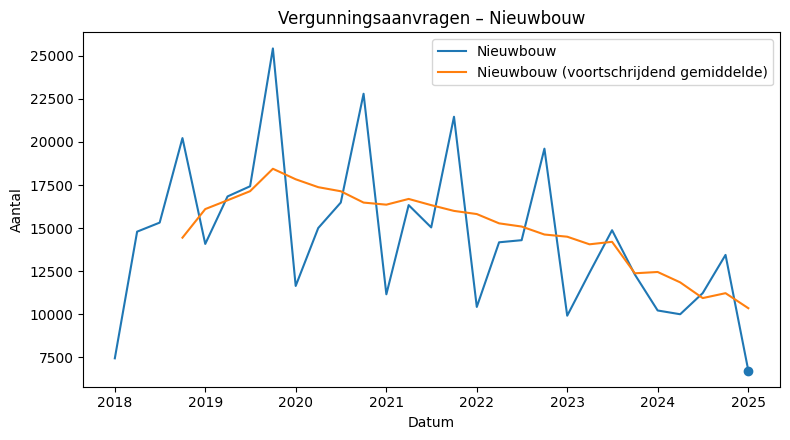

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4.5))
plt.plot(df["Datum"], df["Nieuwbouw"], label="Nieuwbouw")
plt.plot(df["Datum"], df["Nieuwbouw (voortschrijdend gemiddelde)"], label="Nieuwbouw (voortschrijdend gemiddelde)")
# Annotatie Q1 2025
x_annot = pd.to_datetime("2025-01-01")
y_annot = df.loc[df["Datum"]==x_annot, "Nieuwbouw"].values[0]
plt.scatter([x_annot],[y_annot])
plt.title("Vergunningsaanvragen – Nieuwbouw")
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.legend()
plt.tight_layout()
plt.show()

### Vergunningsaanvragen voor verbouwen en hergebruik (niveau en 1-jarig voortschrijdend gemiddelde)

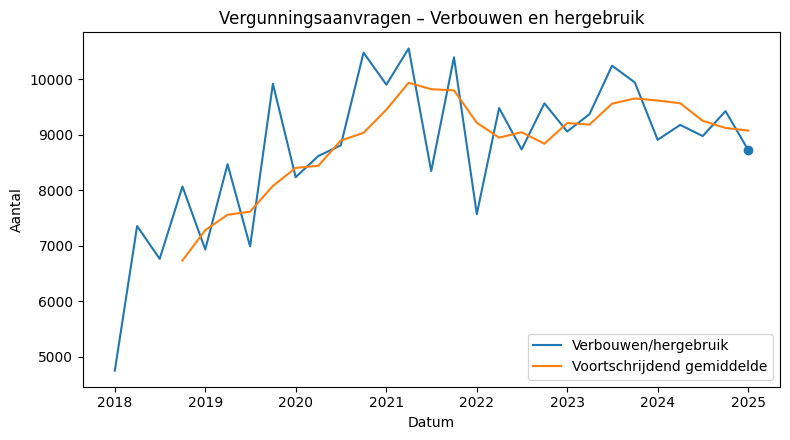

In [5]:
fig = plt.figure(figsize=(8,4.5))
plt.plot(df["Datum"], df["Verbouwen of hergebruik"], label="Verbouwen/hergebruik")
plt.plot(df["Datum"], df["Verbouwen of hergebruik (voortschrijdend gemiddelde)"], label="Voortschrijdend gemiddelde")
x_annot = pd.to_datetime("2025-01-01")
y_annot = df.loc[df["Datum"]==x_annot, "Verbouwen of hergebruik"].values[0]
plt.scatter([x_annot],[y_annot])
plt.title("Vergunningsaanvragen – Verbouwen en hergebruik")
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.legend()
plt.tight_layout()
plt.show()

### Vergunningsaanvragen voor sloop & heropbouw (niveau en 1-jarig voortschrijdend gemiddelde)

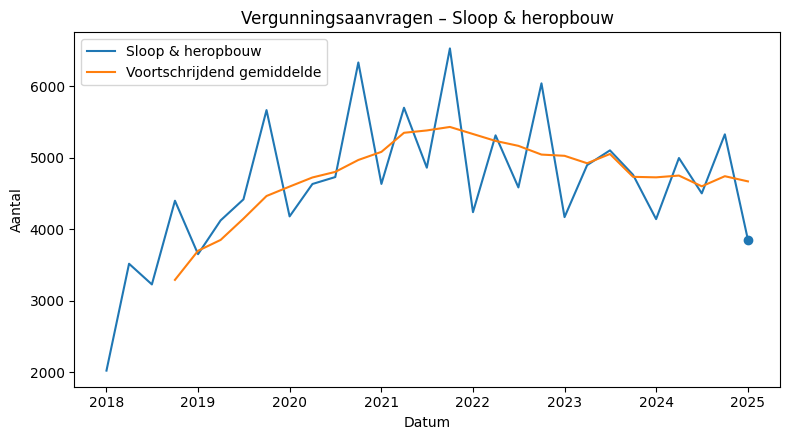

In [6]:
fig = plt.figure(figsize=(8,4.5))
plt.plot(df["Datum"], df["Sloop"], label="Sloop & heropbouw")
plt.plot(df["Datum"], df["Sloop (voortschrijdend gemiddelde)"], label="Voortschrijdend gemiddelde")
x_annot = pd.to_datetime("2025-01-01")
y_annot = df.loc[df["Datum"]==x_annot, "Sloop"].values[0]
plt.scatter([x_annot],[y_annot])
plt.title("Vergunningsaanvragen – Sloop & heropbouw")
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.legend()
plt.tight_layout()
plt.show()

## Interactief verkennen (optioneel)

## Conclusie & aanbevelingen
- **Nieuwbouw**: Q1 2025 ligt ~een derde lager dan Q1 2024 en op ~de helft van Q1 2019 → **dieptepunt**.
- **Verbouwen/hergebruik**: Q1 2025 onder niveau van 2024 en 2023.
- **Sloop & heropbouw**: Q1 2025 zakt onder de drempel van 4.000, na meerdere jaren erboven.

**Aanbevelingen (Embuild Vlaanderen – 5 voorstellen):**
1. **Gecoördineerd beleid rond betaalbaar wonen.**
2. **Aanpak van lokale beperkingen** en voorspelbare RO-visie.
3. **Versimpelen en versnellen van vergunningsprocedures** (vergunningen-turbo).
4. **Versneld faciliteren en uitbreiden van sociale huisvesting**, met open model voor private actoren.
5. **Kosten op nieuwbouw verlagen** (bv. registratierechten op grond naar 2%) om de fiscale scheeftrekking t.o.v. bestaande woningen te verkleinen.


## Appendix

In [7]:
import sys, platform, matplotlib
print("Python:", sys.version.split()[0])
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Bestand:", CSV_PATH)

Python: 3.11.12
Pandas: 2.3.2
Matplotlib: 3.10.5
Bestand: ../assets/Embuild_vergunningen_story/graph_data_export.csv


### Publiceren
- **Naar HTML**: `jupyter nbconvert --to html Embuild_vergunningen_story.ipynb`
- **Naar PDF**: `jupyter nbconvert --to pdf Embuild_vergunningen_story.ipynb`
- **Als webapp (zonder code)**: bekijk **Voilà** (`voila Embuild_vergunningen_story.ipynb`).